In [ ]:
# La machine reçoit des données caractérisées par des variables x et annotées d'une variable y

## Les variables x sont les 'features' 

## La variable y est elle le 'label' / 'targer'

### Le but est alors de prédire y à partir des features x 


In [ ]:
# On commence par transmettres des données a notre machine ~ on créer un Dataset

## On spécifie ensuite quel type de modèle la machine doit apprendre et ses Hyperparamètres
## (Linéaire, arbre de décision, réseau de neurone, etc..., avec cb de branche, cb de neurones etc..)

### La machine va ensuite utiliser un algorythme d'optimisation pour trouver quels sont les paramètres du modèle qui nous 
### donne les meilleurs performances pour nos données 

    # C'est la phase d'Entraînement


In [ ]:
# On est bon, la machine va maintenant utiliser ce modèle pour prévoir la valeur de y lorsqu'on lui fournit 
# de nouvelles observations avec les mêmes variables caractéristiques x.


In [ ]:
# Construire un modèle se fait toujours sur la base suivante : 

    ## Objet = Constructeur ( Hypeparamètres )


In [ ]:
# Meme si tous les modèles sont différents, leur interface d'utilisation est TOUJOURS la même ! 

# 1 _ Selectionner un estimateur et préciser ses hyperparamètres 
# Model = LinearRegression ( .., .., .. )

## 2 _ Entrainer le modèle sur les données X,y
## model.fit(X, y)

### 3 _ Evaluer le modèle 
### model.score(X, y)

#### 4 _ Utiliser le modèle sur de nouvelles observations x
#### model.predict(x)


# Comment Choisir sont modèle ? 

In [1]:
import matplotlib.pyplot as plt

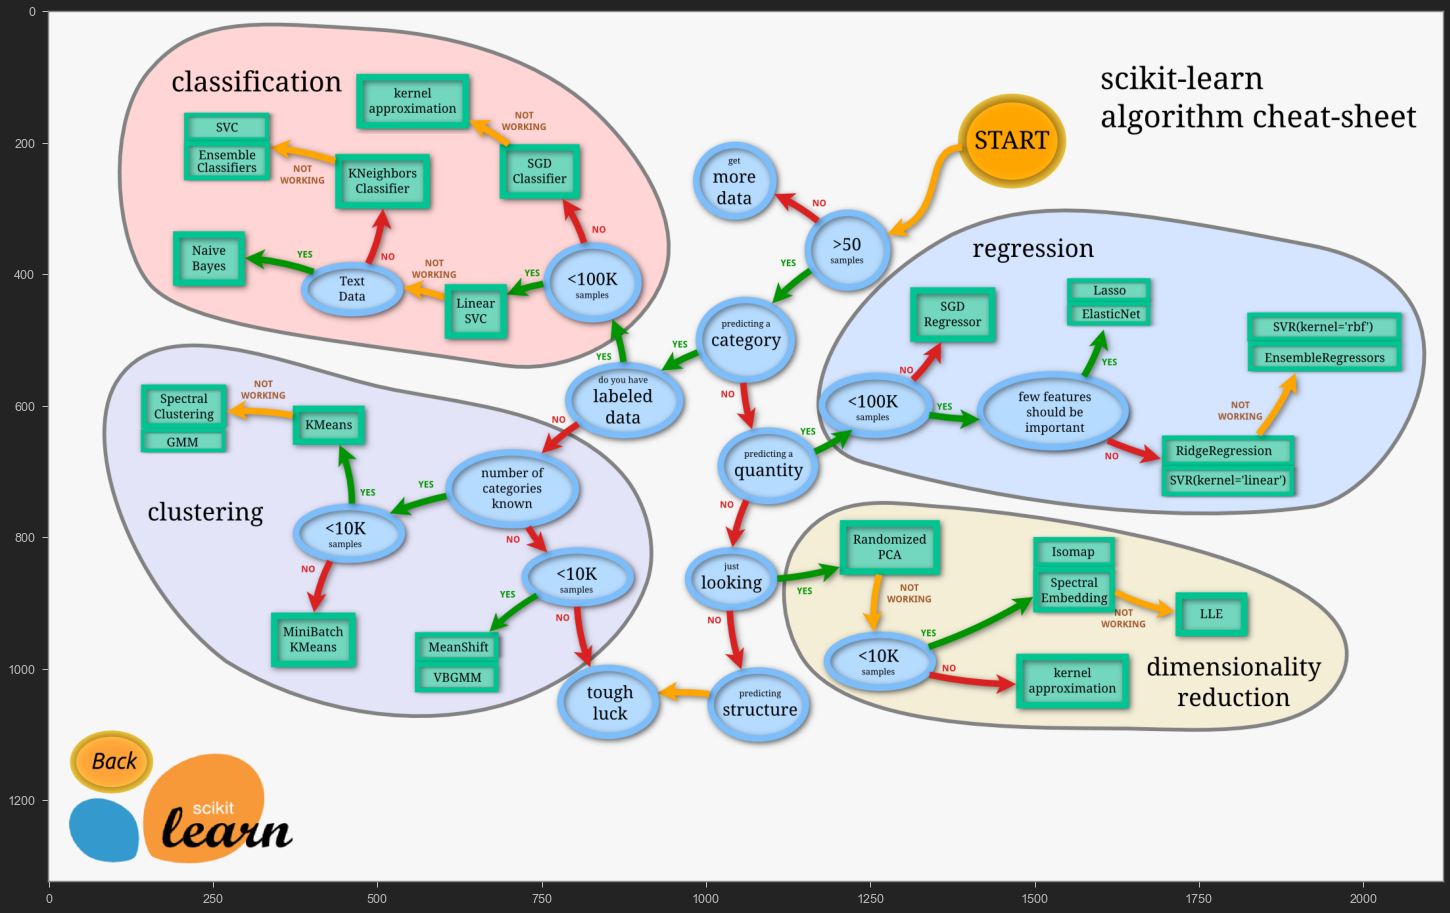

In [1]:
image = plt.imread('ml_map.png')

plt.figure(figsize=(25,20))
plt.imshow(image)

# 1 ) Regression avec SKLearn

In [14]:
# https://scikit-learn.org/stable/

import numpy as np
import matplotlib.pyplot as plt

In [13]:
np.random.seed(0)
m = 100 # On créer 100 échantillons
X = np.linspace(0, 10, m).reshape(m, 1) # On créer M points puis on transforme ca en 1 colonne de M observations
y = X + np.random.randn(m,1)

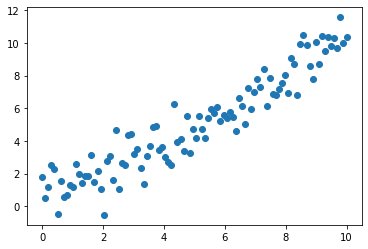

In [15]:
plt.scatter(X, y)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression() # On implémente ici la méthode des MCO, qui n'a donc pas besoin d'hyperparamètres
model.fit(X, y)
model.score(X, y) # On obient ici un coefficient de détermination, un R2

0.8881140743377214

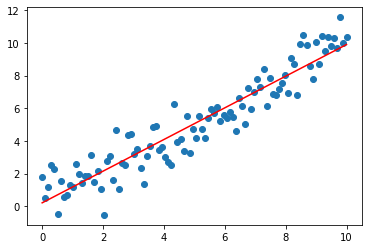

In [24]:
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, c='r')

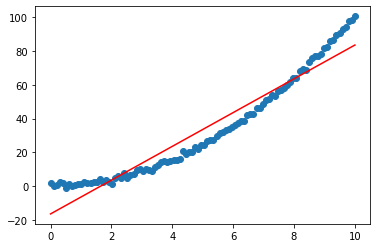

In [26]:
# Si l'on a une forme autre que linéaire, notre modèle n'est plus adapté 

np.random.seed(0)
m = 100 # On créer 100 échantillons
X = np.linspace(0, 10, m).reshape(m, 1) # On créer M points puis on transforme ca en 1 colonne de M observations
y = X**2 + np.random.randn(m,1) 

model = LinearRegression() # On implémente ici la méthode des MCO, qui n'a donc pas besoin d'hyperparamètres
model.fit(X, y)
model.score(X, y)

predictions = model.predict(X)
plt.scatter(X, y)
plt.plot(X, predictions, c='r')

In [27]:
# On utilisera alors SVR par exemple (cf : ml_map)

from sklearn.svm import SVR

C:\Users\witec\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


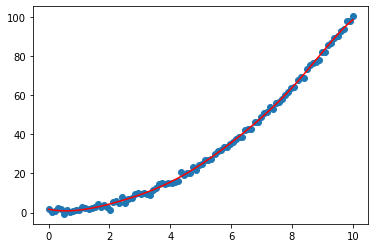

In [29]:
np.random.seed(0)
m = 100 # On créer 100 échantillons
X = np.linspace(0, 10, m).reshape(m, 1) # On créer M points puis on transforme ca en 1 colonne de M observations
y = X**2 + np.random.randn(m,1)

model = SVR(C=100) 
model.fit(X, y)
model.score(X, y)

predictions = model.predict(X)
plt.scatter(X, y)
plt.plot(X, predictions, c='r')

# 2) Problème de Classification 

In [1]:
import seaborn as sns 
import pandas as pd

In [2]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [4]:
# On va ici chercher un modèle de classification pour déterminer si un passager va survivre ou non

# Pour résoudre un problème de classification, il faut commencer par charger un modèle de classification
## On va par exemple choisir ici KneighboorsClassifier

from sklearn.neighbors import KNeighborsClassifier

In [5]:
modelKNC = KNeighborsClassifier() 

# On a notre modèle, il faut maintenant l'entrainer
## Mais pour l'instant nous n'avons pas de X et y
### On va alors divisé notre tableau

In [6]:
y = titanic['survived']
X = titanic.drop('survived', axis = 1)

In [7]:
model.fit(X, y)

KNeighborsClassifier()

In [53]:
model.score(X, y)

# Ainsi notre modèle effetue 83% du temps une bonne prédiction sur le fait que le passager est survie ou non

0.8319327731092437

In [54]:
# En utilisant prédict, on peut alors déterminer les chances de survies selon des caractéristiques choisies

def survie (model, pclass, sex, age):
    x = np.array([pclass, sex, age]).reshape(1, 3) # car il nous faut un tableau à deux dimension
    print(model.predict(x))

In [62]:
survie (modelKNC, 3, 0, 23)

[0]


### Predict_Proba

In [63]:
# On peut également caluler la probabilité d'appartenir à la classe 0 ou à la classe 1 de survivded

def SurvieProb (model, pclass, sex, age):
    x = np.array([pclass, sex, age]).reshape(1, 3) # car il nous faut un tableau à deux dimension
    print(model.predict_proba(x))

In [68]:
SurvieProb (model, 3, 0, 21)

[[0.8 0.2]]
